In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

def nice(df):
    df.replace(to_replace= '0.079477', value = '0.079', inplace=True )
    df.replace(to_replace= '0.79477', value = '0.795', inplace=True )
    df.replace(to_replace= '0.25133', value = '0.251', inplace=True )
    df.replace(to_replace= '2.5133', value = '2.513', inplace=True )
    df.replace(to_replace= '7.9477', value = '7.948', inplace=True )

    df['Gamma'] = df['Gamma'].astype(float)

    df['Infidelity'] = df['Infidelity'].abs()

    df.loc[df["Infidelity"] < 1e-12, "Infidelity"] = 1e-12

    df['Log_Infidelity'] = np.log10(df['Infidelity'])

    df.loc[df["Log_Infidelity"] < -12, "Log_Infidelity"] = -12

    return df

In [2]:
df = pd.read_pickle("dataframe_POP_NEW_LME_AMZ2_op1_random_trn4_tst10_2024-Mar-13_at_14-40.pkl")

In [3]:
df

,Gamma,State,Time,gt,Fidelity,Infidelity,Distance
0,0.079477,D1,0.06000,0.004769,1.000000,-6.039613e-14,0.459559
1,0.079477,D1,0.08000,0.006358,1.000000,1.565572e-08,0.459559
2,0.079477,D1,0.10000,0.007948,1.000000,1.988449e-07,0.459559
3,0.079477,D1,0.12000,0.009537,1.000000,7.039876e-08,0.459559
4,0.079477,D1,0.14000,0.011127,0.999997,3.404646e-06,0.459559
...,...,...,...,...,...,...,...
1996,79.477,D10,0.09980,7.931805,0.999257,7.426887e-04,0.181422
1997,79.477,D10,0.09985,7.935778,0.999257,7.434949e-04,0.181422
1998,79.477,D10,0.09990,7.939752,0.999256,7.443017e-04,0.181422
1999,79.477,D10,0.09995,7.943726,0.999255,7.451091e-04,0.181422


In [4]:
df[df.Gamma == "25.133"].Fidelity.min()
df[df.Gamma == "251.33"].Fidelity.min()

0.9955137869322536

In [6]:
df = nice(df)

In [7]:
gammas = ['25.133', '79.477', '251.33']

pd.unique(df["Gamma"])

array([7.9000e-02, 2.5100e-01, 7.9500e-01, 2.5130e+00, 2.5133e+01,
       2.5133e+02, 7.9480e+00, 7.9477e+01])

In [8]:
def log_infidelity_from_gamma(df, title):
   
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y="Log_Infidelity", cut = 0, # hue = "Method", split=True,
                        scale="width", palette ="cool", linewidth=0.5,
                        inner= None, bw="silverman")
    
    ymin = -6
    ymax = -0.1
    
    tick_range = np.arange(ymin, ymax)
    ax.yaxis.set_ticks(tick_range, [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$',])
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_title(title)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.01), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.01), '0.01', ha='left', va='center')
    
    ax.hlines(y=np.log10(.02), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.02), '0.02', ha='left', va='center')
 
    return fig

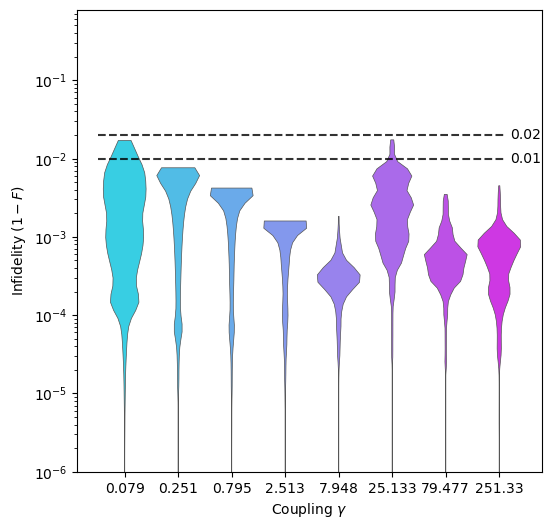

In [9]:
fig = log_infidelity_from_gamma(df, "")

In [ ]:
#fig.savefig("LogInfidelity....pdf")

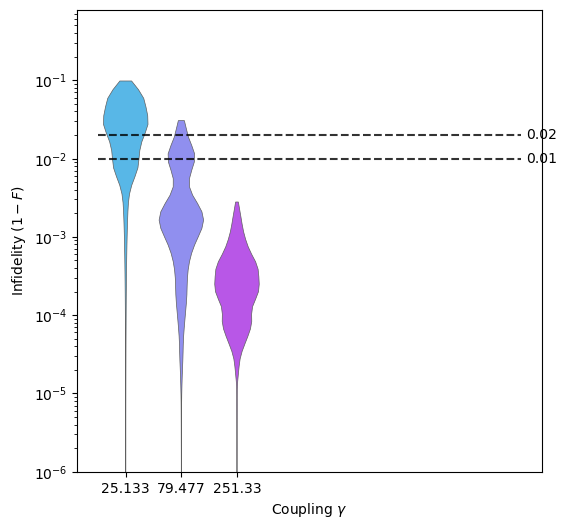

In [9]:
fig = log_infidelity_from_gamma(df, "")

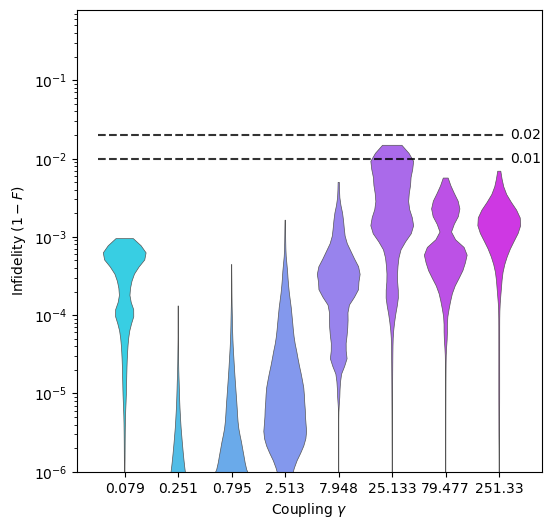

In [24]:
fig = log_infidelity_from_gamma(df, "")